<div align="center">
    <img src="https://moodle.cct.ie/pluginfile.php/1/theme_catawesome/logo/1742974865/logo.png" alt="Logo" width="500"/>
</div>


<div style="text-align: center;">
    <h2>ML_CA1_V6 </h2>
    <h3> Machine Learning for AI</h3>
    <h3>Name: Rayen Bentemessek</h3>
    <h3>Student Numbers: 2021378 </h3>
</div>

# Spam Classification 



This notebook walks through the complete process of building a machine learning model to classify spam emails using the `spambase_v6.csv` dataset. The analysis is structured around the following key steps:

---

## 1. Exploratory Data Analysis & Data Preparation (Combined)
- Dataset inspection and null value handling
- Class distribution analysis (spam vs. not spam)
- Correlation overview  
- Outlier detection and scaling effects


EDA and data preparation were combined, I was preparing the data as I explore it.

---

## 2. Modeling & Evaluation
- **K-Nearest Neighbors (KNN):** tested with multiple scaling, transformation and tuning strategies
- **Multinomial Naive Bayes:** handled with different splitting methods, log transformation and MinMax scaling
- **Random Forest:** tested default and tuned variants with and without stratified split

Each model was evaluated using:
-  Huge focus was given to **False Negatives (FN)** and **False Positives (FP)**, due to their importance on spam classification:
    - *False negatives (missed spam)*
    - *False positives (Classifying non spam emails as spam)* 
- Confusion matrices
- Classification Report: **Accuracy**, **Precision**, **Recall**, and **F1-score** 
- summary comparison table for all model variants (for the positive -spam- class)
---

## 3. Final Classification Summary
- Discussion of the best-performing model
- Confusion matrix comparison across top models
- Justification for model selection

## 4. References

# Exploratory Data Analysis & Data Preparation (Combined)


In [1]:
# measuring the notebook duration
import time
start_time = time.time()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('spambase_v6.csv')

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0,0,0.00,0.00,0.00,0.64,0.00,0,0,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0,0.00,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0,0.00,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0,0.00,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


I noticed that some columns have null values, and some columns were not numerical
So I extracted these columns to inspect them
I noticed that some of them had values like 'zero', '?', 'none' and some were empty, so I changed the column data type to numeric and the undesired values to null values.
The dataset was not big in size and ratio of these null values was very low (max %5) so I chose to keep them and change these NA's to 0's.
Also, I had a column 'Unnamed: 0' that is not relevant our project, so I dropped it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   object 
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   object 
 8   word_freq_internet          4586 non-null   object 
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [5]:
# Extracted columns with object data type to inspect them
columns_to_change = df.select_dtypes(exclude=['float64','int64','bool'])
columns_to_change

,word_freq_address,word_freq_our,word_freq_remove,word_freq_internet,word_freq_report,word_freq_addresses,word_freq_000,word_freq_hpl,word_freq_labs
0,0.64,0.32,0,0,0,0,0,0,NaN
1,0.28,0.14,0.21,0.07,0.21,0.14,0.43,0,NaN
2,0,1.23,0.19,0.12,0,1.75,1.16,0,NaN
3,0,0.63,0.31,0.63,0,0,0,0,NaN
4,0,0.63,0.31,0.63,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
4596,0,0,0,0,0,zero,0,0,0
4597,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0
4599,0,0.32,0,0,0,0,0,0,0


In [6]:
# Store invalid (non-numeric) values
invalid = {}

for col in columns_to_change:
    # Convert entire column to string, then check which values fail numeric conversion
    mask = pd.to_numeric(df[col].astype(str), errors='coerce').isna()
    
    # Extract unique values that failed (excluding actual NaNs)
    unique_invalid = df.loc[mask, col].dropna().unique()
    
    if len(unique_invalid) > 0:
        invalid[col] = unique_invalid

# Print the invalid values found
for col, values in invalid.items():
    print(f"Invalid values in {col}: {values}")


Invalid values in word_freq_address: ['zero']
Invalid values in word_freq_our: ['???']
Invalid values in word_freq_remove: ['?']
Invalid values in word_freq_internet: ['?']
Invalid values in word_freq_report: ['zero']
Invalid values in word_freq_addresses: ['zero']
Invalid values in word_freq_000: ['???']
Invalid values in word_freq_hpl: ['none']
Invalid values in word_freq_labs: ['no']


We notice that we have few invalid values, like zero, ?, none and no in addition to null values.
That is why I will be changing all these these values to 0's as it is the one that makes more sense in this compared to other imputation techniques such as mean or median.
Before that, we need to change these values to numeric, we will use coerce for the invalid parsing to be NaN. so those values will become NaNs first, and I will impute them with 0's.

In [7]:
# changed the columns types to float, values like (zero, ???, None) will become null values
columns_to_change = columns_to_change.columns.tolist()
df[columns_to_change] = df[columns_to_change].apply(pd.to_numeric, errors='coerce')

In [8]:
# checking the number of null values within the dataframe
print(df.isna().sum())


Unnamed: 0                      0
word_freq_make                  0
word_freq_address               1
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   1
word_freq_over                  1
word_freq_remove                1
word_freq_internet             16
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                1
word_freq_addresses           321
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   1
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   1
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [9]:
# fill null values with 0's
df = df.fillna(0)
# dropped index column as it is not relevant
df = df.drop(columns='Unnamed: 0')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

The previous preparation cells were necessary in order to visualise our data, and even to implement the model as we can not proceed with missing or unwanted values, so that had to be prioritised at first.

In the next few lines, we will explore our data with different vizualisations that will give us few insights and more information about the overall structure, which will be so helpful in building a good model.

The first finding I noticed, is that we have a large number of features, leading to a highly dimensional dataset, 57 features would definitely affect the performance of the model we will choose and this needs to be taken care of before the modelling stage. Later on, just below the correlation matrix, I will be discussing what am I going to do regarding this high dimensionality.

In [11]:
df['is_spam'].value_counts()


is_spam
False    2788
True     1813
Name: count, dtype: int64

From the distribution of our emails, 2788 non-spam (60.6%) vs. 1813 spam emails (39.4%), we notice a very slight imbalance.
While imbalance can affect building a classification model, it is not a major problem in our case, however I would consider including a decision-tree based algorithm as they perform slightly better with imbalanced variables. 
Again, this is not a major issue and 60/40 is generally acceptable, so we wouldn't be going towards resampling techniques like Synthetic Minority Oversampling Technique (SMOTE), but there is no harm in choosing an algorithm known to have better handling of imbalanced data even if it's slight (mmalinda, 2020).

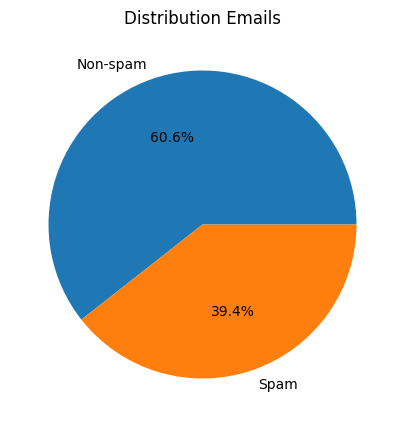

In [12]:
## Distrbution of spam and non spam emails
plt.figure(figsize=(10,5))
counts = df['is_spam'].value_counts()
plt.pie(counts, labels=['Non-spam','Spam'],autopct='%1.1f%%')
plt.title("Distribution Emails")
plt.show()

I implemented the correlation matrix and heatmap to see if there's any correlations between our target variable 'is_spam' and any other variables.
There was not any strong correlations and the stronget we could get was 0.38 with the word 'your' and that doesn't really tell us anything.
So I decided to extract the top 10 correlated features (as the correlation heatmap was huge with 58 features)

In [13]:
cormat = df.corr()
round(cormat,2)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.00,-0.02,0.07,0.01,0.02,0.06,0.01,-0.00,0.11,0.04,0.19,0.11,0.07,0.04,0.03,0.06,0.08,0.05,0.13,0.02,0.20,-0.02,0.13,0.19,-0.07,-0.06,-0.07,-0.05,-0.04,-0.05,-0.04,-0.03,-0.04,-0.03,-0.04,-0.05,-0.06,-0.01,-0.01,-0.04,-0.01,-0.03,-0.02,-0.02,-0.04,-0.03,-0.00,-0.02,-0.03,-0.02,-0.03,0.06,0.12,-0.01,0.04,0.06,0.09,0.13
word_freq_address,-0.02,1.00,-0.03,-0.01,-0.02,-0.02,0.00,-0.02,-0.00,0.03,-0.01,-0.04,-0.02,-0.01,0.01,-0.01,-0.02,0.03,-0.06,-0.02,-0.02,-0.01,-0.02,0.00,-0.04,-0.04,-0.03,-0.03,-0.02,-0.03,-0.02,-0.00,-0.02,-0.00,-0.02,-0.03,-0.02,-0.01,-0.02,-0.01,-0.02,-0.03,-0.00,-0.02,-0.02,-0.02,-0.01,-0.02,-0.01,-0.05,-0.02,-0.01,-0.01,0.00,0.00,0.00,-0.02,-0.03
word_freq_all,0.07,-0.03,1.00,-0.02,0.08,0.09,0.04,0.01,0.09,0.03,0.05,0.08,0.05,0.01,0.12,0.06,0.04,0.12,0.14,0.03,0.16,-0.04,0.12,0.04,-0.09,-0.06,-0.11,-0.05,-0.06,-0.03,-0.04,-0.06,-0.05,-0.06,-0.05,-0.05,-0.07,0.03,-0.01,-0.05,-0.03,-0.01,-0.04,-0.05,-0.05,-0.06,0.03,-0.03,-0.03,-0.02,-0.03,0.11,0.09,-0.00,0.10,0.11,0.07,0.20
word_freq_3d,0.01,-0.01,-0.02,1.00,0.00,-0.01,0.02,0.01,-0.00,-0.00,-0.01,-0.02,-0.01,0.01,0.00,0.01,0.00,0.02,-0.01,-0.01,0.01,0.03,0.01,0.04,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.02,0.06
word_freq_our,0.02,-0.02,0.08,0.00,1.00,0.05,0.15,0.03,0.02,0.03,0.07,0.07,0.03,0.00,0.06,0.08,0.14,0.06,0.10,0.03,0.14,-0.02,0.07,0.00,-0.07,-0.08,-0.09,-0.06,0.03,-0.05,-0.04,-0.03,-0.03,-0.03,-0.05,-0.05,-0.07,0.13,-0.04,-0.02,-0.05,0.12,-0.05,0.02,-0.04,-0.08,-0.03,-0.03,-0.03,-0.05,-0.03,0.03,0.04,0.00,0.05,0.05,0.00,0.24
word_freq_over,0.06,-0.02,0.09,-0.01,0.05,1.00,0.06,0.08,0.12,0.01,0.05,0.01,0.08,0.01,0.17,0.02,0.06,0.08,0.10,0.06,0.11,0.01,0.21,0.06,-0.08,-0.09,-0.07,-0.07,-0.05,-0.05,-0.05,-0.04,-0.03,-0.04,-0.05,-0.05,-0.06,-0.02,-0.05,-0.03,-0.03,-0.05,-0.03,-0.03,-0.05,-0.03,-0.01,-0.03,-0.02,-0.01,-0.02,0.07,0.11,0.02,-0.01,0.09,0.08,0.23
word_freq_remove,0.01,0.00,0.04,0.02,0.15,0.06,1.00,0.04,0.05,0.06,0.16,-0.00,0.01,-0.02,0.04,0.13,0.19,0.12,0.11,0.05,0.13,-0.00,0.06,0.03,-0.09,-0.08,-0.07,-0.07,-0.05,-0.06,-0.05,-0.04,-0.04,-0.04,-0.05,-0.05,-0.05,-0.01,-0.05,-0.02,-0.03,-0.05,-0.05,-0.03,-0.05,-0.06,-0.02,-0.03,-0.03,-0.05,-0.03,0.05,0.07,0.05,0.04,0.06,-0.01,0.33
word_freq_internet,-0.00,-0.02,0.01,0.01,0.03,0.08,0.04,1.00,0.11,0.08,0.13,-0.00,0.03,0.01,0.07,0.05,0.22,0.04,0.02,0.11,0.16,-0.02,0.09,0.03,-0.05,-0.04,-0.06,-0.05,-0.04,-0.04,-0.04,-0.03,-0.04,-0.03,-0.04,-0.03,-0.02,-0.01,-0.03,-0.01,-0.00,-0.04,-0.00,-0.03,-0.00,-0.04,-0.01,-0.02,-0.03,-0.03,-0.02,0.03,0.06,-0.01,0.01,0.04,0.04,0.21
word_freq_order,0.11,-0.00,0.09,-0.00,0.02,0.12,0.05,0.11,1.00,0.13,0.14,0.03,0.03,0.07,0.24,0.01,0.16,0.10,0.04,0.12,0.16,-0.02,0.13,0.10,-0.07,-0.05,-0.06,-0.06,-0.04,-0.04,-0.04,-0.03,-0.01,-0.03,-0.04,-0.06,-0.03,-0.00,-0.04,-0.01,-0.04,-0.05,-0.03,-0.04,-0.08,-0.06,0.01,-0.03,-0.01,-0.03,0.01,0.04,0.15,-0.00,0.11,0.19,0.25,0.23
word_freq_mail,0.04,0.03,0.03,-0.00,

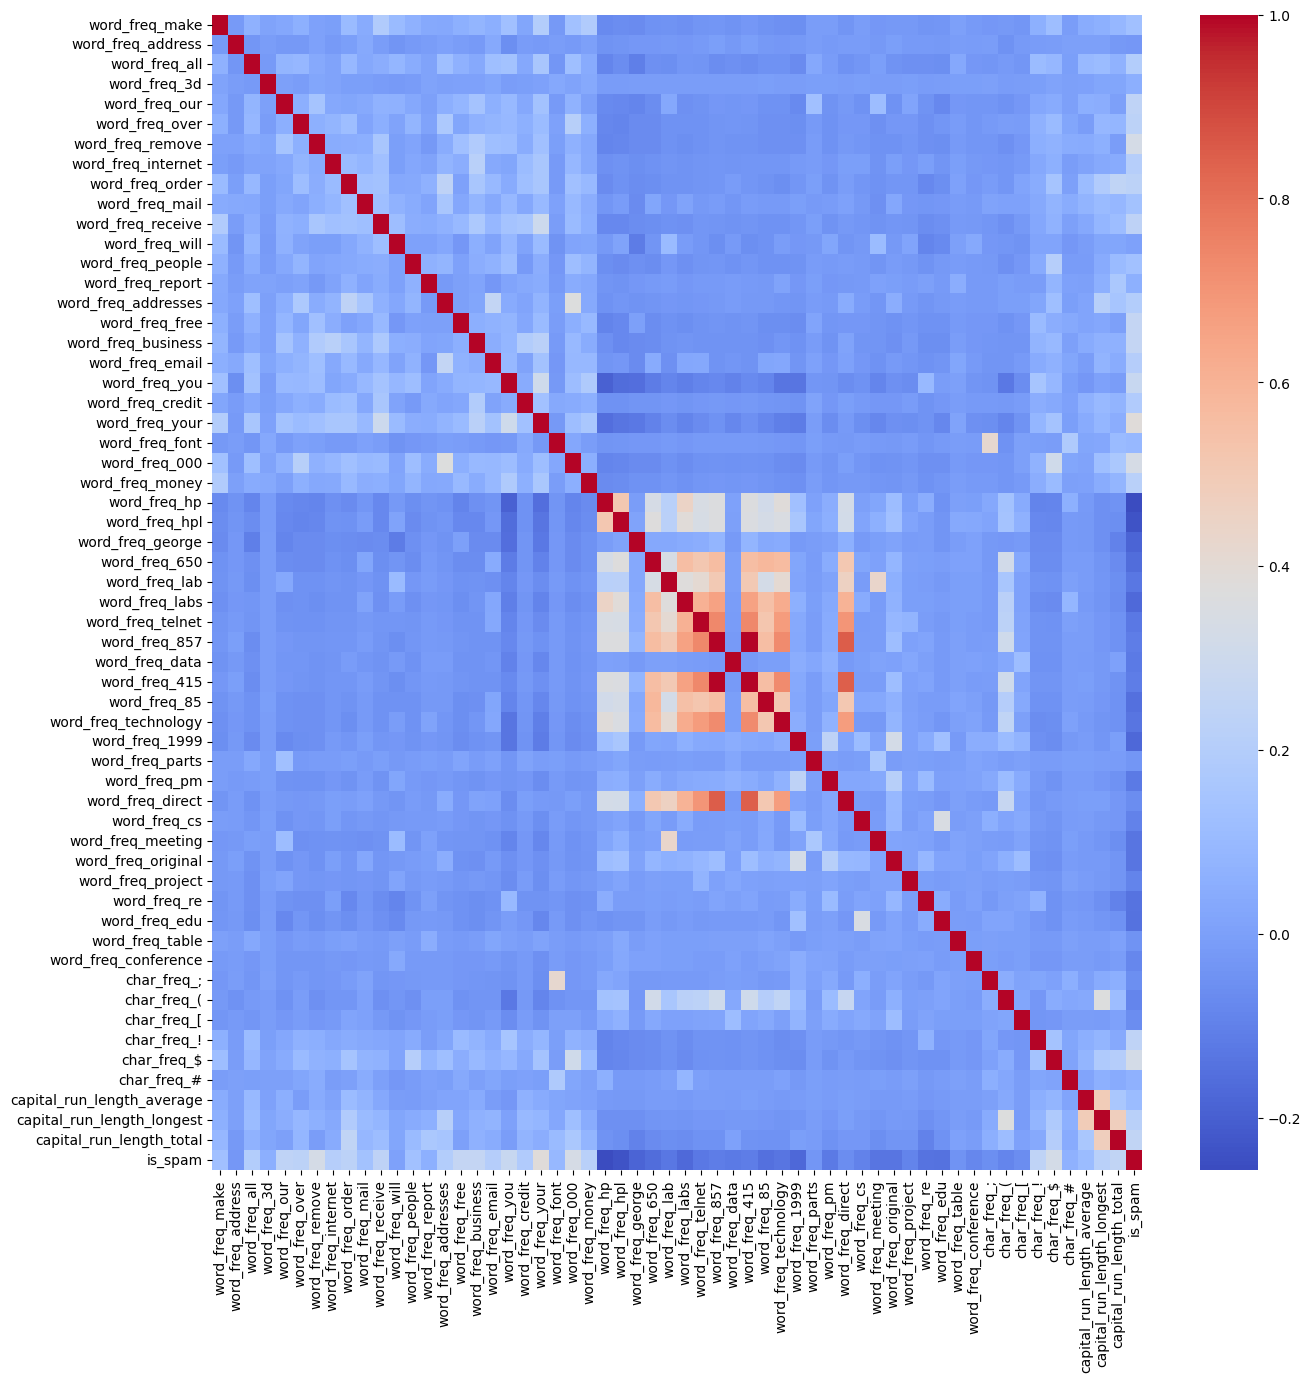

In [14]:
## correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cormat,cmap='coolwarm');


In [15]:
## Getting the top 10 correlations
cormat_unstacked = cormat.abs().unstack().sort_values(ascending=False)
cormat_unstacked = cormat_unstacked[cormat_unstacked < 1]
top_10_correlations = cormat_unstacked.drop_duplicates().head(10)
print(top_10_correlations)


word_freq_857         word_freq_415           0.996066
word_freq_direct      word_freq_857           0.848021
word_freq_415         word_freq_direct        0.845359
word_freq_857         word_freq_telnet        0.737555
word_freq_telnet      word_freq_415           0.735187
word_freq_technology  word_freq_857           0.729750
                      word_freq_415           0.727119
word_freq_telnet      word_freq_direct        0.699918
                      word_freq_technology    0.677790
word_freq_direct      word_freq_technology    0.674249
dtype: float64


I decided to go further with these correlated features, and I took 2 of highest correlations (word_freq_415 vs word_freq_857) and (word_freq_857 vs word_freq_direct) and visualized them in a histogram, and the data points were labeled by the spam labels, the results were quite interesting.
The 2 histograms show us -apart from the highly positive correlation that we alreadt know-, that whenever the words 415/857 and 857/direct happen to be together in an email, that email is a spam message. This doesn't mean whenever 415 is frquent that is a spam email, correlation doesn't mean causation, but it's something that needs to be taken into consideration while implementing the model, as some algorithms would struggle more with this mulitcollinearity.

This extremely high correlation between some variables can indeed affect the performance of the model chosen. While Decision Trees algorithm are not  affected in terms of accuracy (they are affected in terms of computation but in our case we don't have a large dataset to worry about that). This finding will actually add on the previous finding of the slight imbalance, in addition to the high dimensionality, in choosing a tree based algorithm (Decision Tree, Random Forest) as they would perform much better within these circumstances.
However, since I'm not only going to choose decision tree algorithms, We need to pay attention to this Multicollinearity, and one of the methods to do so is Principal Component Analysis (PCA), that will aim to reduce the number of features, keeping only the most important ones, which will lead to reducing the most correlated features by keeping the most important information with the least number of features. Another method is to remove one of the features, but I won't be doing it because each data is different, I would have done if my columns were GDP and GDP per capita, where there is a mathematical operation that links them together, but the words 415 and 857 don't have any real relationship, so I'm keeping both. (Mustafa Erboga, 2024). It is important to mention that some features like capital_run_length_average, capital_run_length_average and capital_run_length_total are mathematically linked, but they don't have a strong correlation (0.49) so I'm keeping them as well.

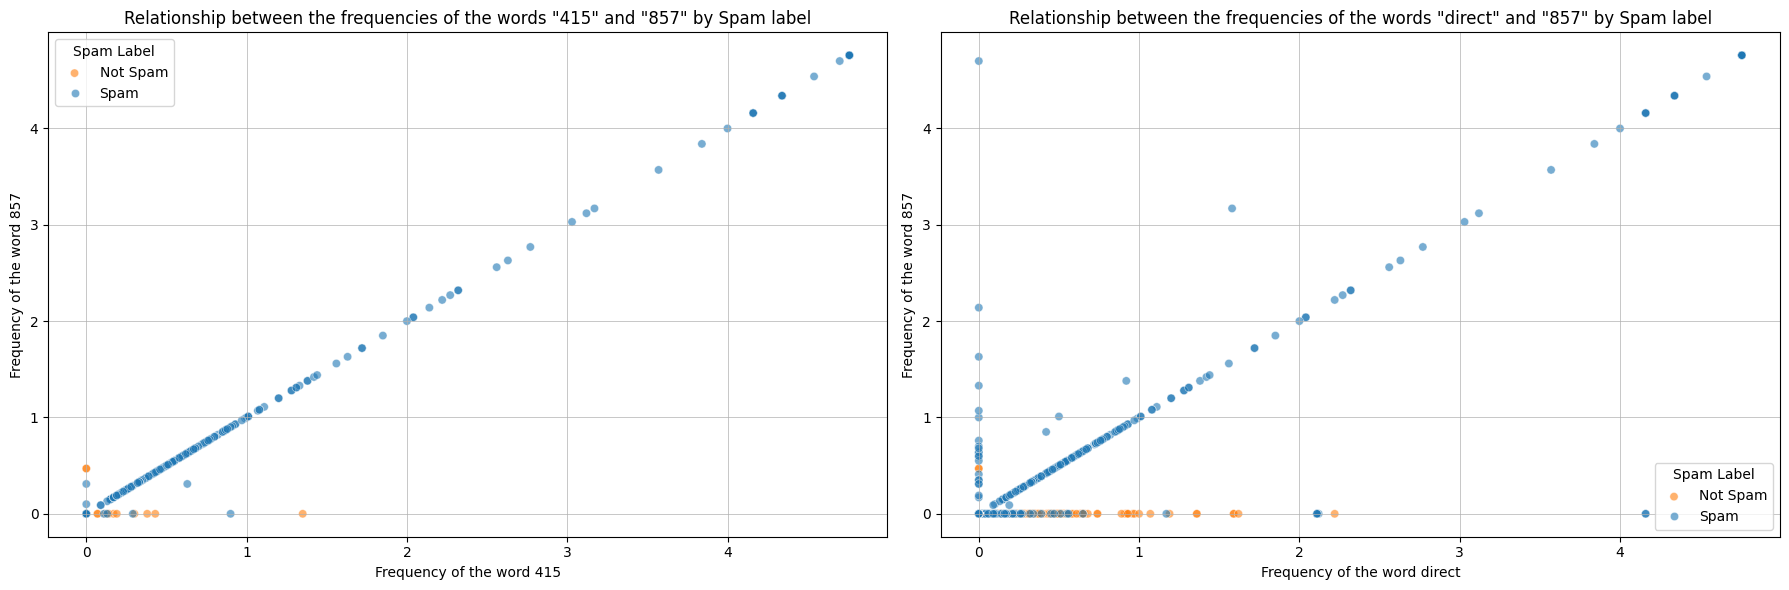

In [16]:
## Subplots of 2 of the most correlated features by spam label

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  

sns.scatterplot(
    x=df['word_freq_415'],  
    y=df['word_freq_857'],
    hue=df['is_spam'],
    alpha=0.6, 
    ax=axes[0]
)

axes[0].grid(True, linestyle='-', linewidth=0.5)
axes[0].set_xlabel("Frequency of the word 415")
axes[0].set_ylabel("Frequency of the word 857")
axes[0].set_title('Relationship between the frequencies of the words "415" and "857" by Spam label')
axes[0].legend(title='Spam Label', labels=['Not Spam', 'Spam'])


sns.scatterplot(
    x=df['word_freq_direct'],  
    y=df['word_freq_857'],
    hue=df['is_spam'],
    alpha=0.6,
    ax=axes[1]

)

axes[1].grid(True, linestyle='-', linewidth=0.5)
axes[1].set_xlabel("Frequency of the word direct")
axes[1].set_ylabel("Frequency of the word 857")
axes[1].set_title('Relationship between the frequencies of the words "direct" and "857" by Spam label')
axes[1].legend(title='Spam Label', labels=['Not Spam', 'Spam'])



plt.tight_layout()
plt.show()


Usually spam emails tend to have long sequences of capital letters and words in their content to catch attention.
So I went to explore that, and created another histogram to reveal the relationship between spam emails and average capital run length, and as expected, the average capital run length is generally higher in spam email compared to non-spam emails.
At first I only created one histogram, but then I decided to show the difference on 4 different scales based on the Average number of capital run, because there was some outliers, but even on the 0-50/0-100-0-200 scales, it is always the spam emails who have a higher average capital run length.

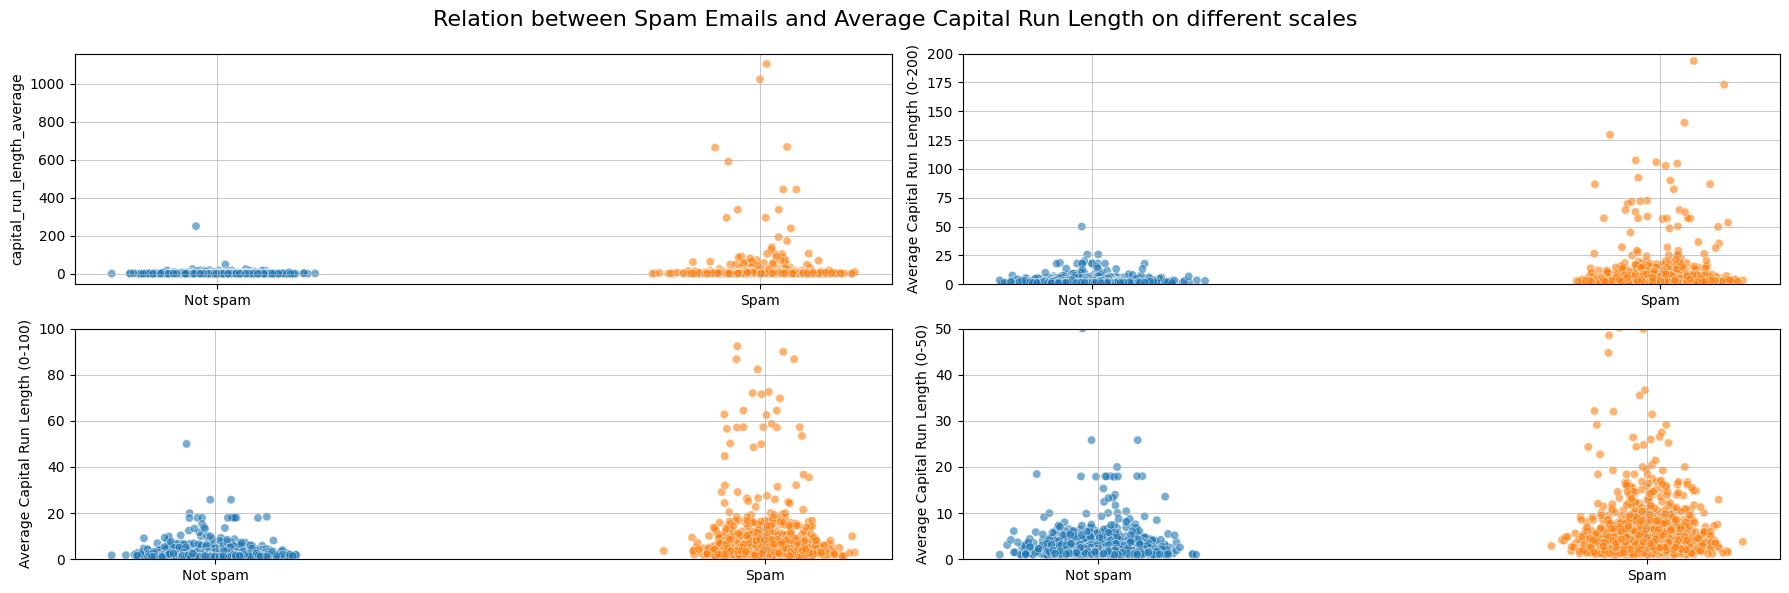

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 6))  

sns.scatterplot(
    # I used jitter as is_spam is boolean so all points will have the same value (either spam or not spam), the plot would look like a straight line,
    # so jittering would spread the points to have a better representation in the plot
    x=np.random.normal(df['is_spam'], 0.05), 
    y=df['capital_run_length_average'],
    hue=df['is_spam'],
    alpha=0.6,    
    ax=axes[0,0],
    legend=False


)
axes[0,0].grid(True, linestyle='-', linewidth=0.5)
axes[0,0].set_xticks([0,1],['Not spam','Spam'])




sns.scatterplot(
    x=np.random.normal(df['is_spam'], 0.05), 
    y=df['capital_run_length_average'],
    hue=df['is_spam'],
    alpha=0.6,    
    ax=axes[0,1],
    legend=False

)
axes[0,1].grid(True, linestyle='-', linewidth=0.5)
axes[0,1].set_xticks([0,1],['Not spam','Spam'])
axes[0,1].set_ylabel("Average Capital Run Length (0-200)")
axes[0,1].set_ylim(0,200)




sns.scatterplot(
    x=np.random.normal(df['is_spam'], 0.05), 
    y=df['capital_run_length_average'],
    hue=df['is_spam'],
    alpha=0.6,    
    ax=axes[1,0],
    legend=False


)
axes[1,0].grid(True, linestyle='-', linewidth=0.5)
axes[1,0].set_xticks([0,1],['Not spam','Spam'])
axes[1,0].set_ylabel("Average Capital Run Length (0-100)")
axes[1,0].set_ylim(0,100)






sns.scatterplot(
    x=np.random.normal(df['is_spam'], 0.05), 
    y=df['capital_run_length_average'],
    hue=df['is_spam'],
    alpha=0.6,    
    ax=axes[1,1],
    legend=False

)
axes[1,1].grid(True, linestyle='-', linewidth=0.5)
axes[1,1].set_xticks([0,1],['Not spam','Spam'])
axes[1,1].set_ylabel("Average Capital Run Length (0-50)")
axes[1,1].set_ylim(0,50)

fig.suptitle("Relation between Spam Emails and Average Capital Run Length on different scales", fontsize=16)
plt.tight_layout()

plt.show()

The following summary table confirms the previous finding, and shows a full comparison between an average spam email and an average non spam email, where we see that spam emails have an average of 9.5 capital run length, compared to 2.3 capital run length, this feature will be highly important in identifying spam email in addition to many other features as well such as word_freq_free, word_freq_you, word_freq_your etc.. 
This will extremely helpful in the success of the model, since it's all based on probabilities, and the role of Machine learning is to find patterns linked to a certain variable, and in this case, without much effort we can easily spot that there are certain patterns linked to the type of email. Features like capital run length, frequency of certain words will play a massive role in identifying the type of email by the classification algorithm.

In [18]:
avg_email = df.groupby(by = 'is_spam').mean()
display(avg_email)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
is_spam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,0.021711,0.536324,0.061664,0.042403,0.008318,0.073587,0.048346,0.097292,1.270341,0.007579,0.438702,0.045226,0.007088,0.017138,0.895473,0.431994,1.265265,0.193806,0.162794,0.165854,0.106033,0.077306,0.150986,0.077787,0.169455,0.141671,0.197744,0.018723,0.121679,0.083117,0.072027,0.216808,0.070581,0.126636,0.415760,0.287184,0.008160,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
True,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,0.118434,0.549972,0.143547,0.083574,0.112079,0.518362,0.287507,0.319228,2.264539,0.205521,1.380370,0.238036,0.247055,0.212879,0.017479,0.009173,0.001550,0.018798,0.000684,0.005968,0.001274,0.000518,0.014562,0.001776,0.006928,0.029515,0.043469,0.004710,0.012427,0.036718,0.000055,0.002443,0.008450,0.006244,0.125091,0.014727,0.001219,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


After that, I moved to check the distribution of my values, I created at first a boxplot of all features which was not a great idea as capital run lengths affected the scale, so I created a subset of my initial dataframe, that contains only frequencies words, i.e to have a general idea on how my values look like.
The results were not really good and further handling needs to be done, there was many outliers in the data within most of the features. While these outliers are normal and part of the 'real world' data, I wouldn't be getting rid of them as much as I will be doing some transformation to the values using scaling and transformation techniques which will reduce the skewness of our dataset (Suresh, 2020).

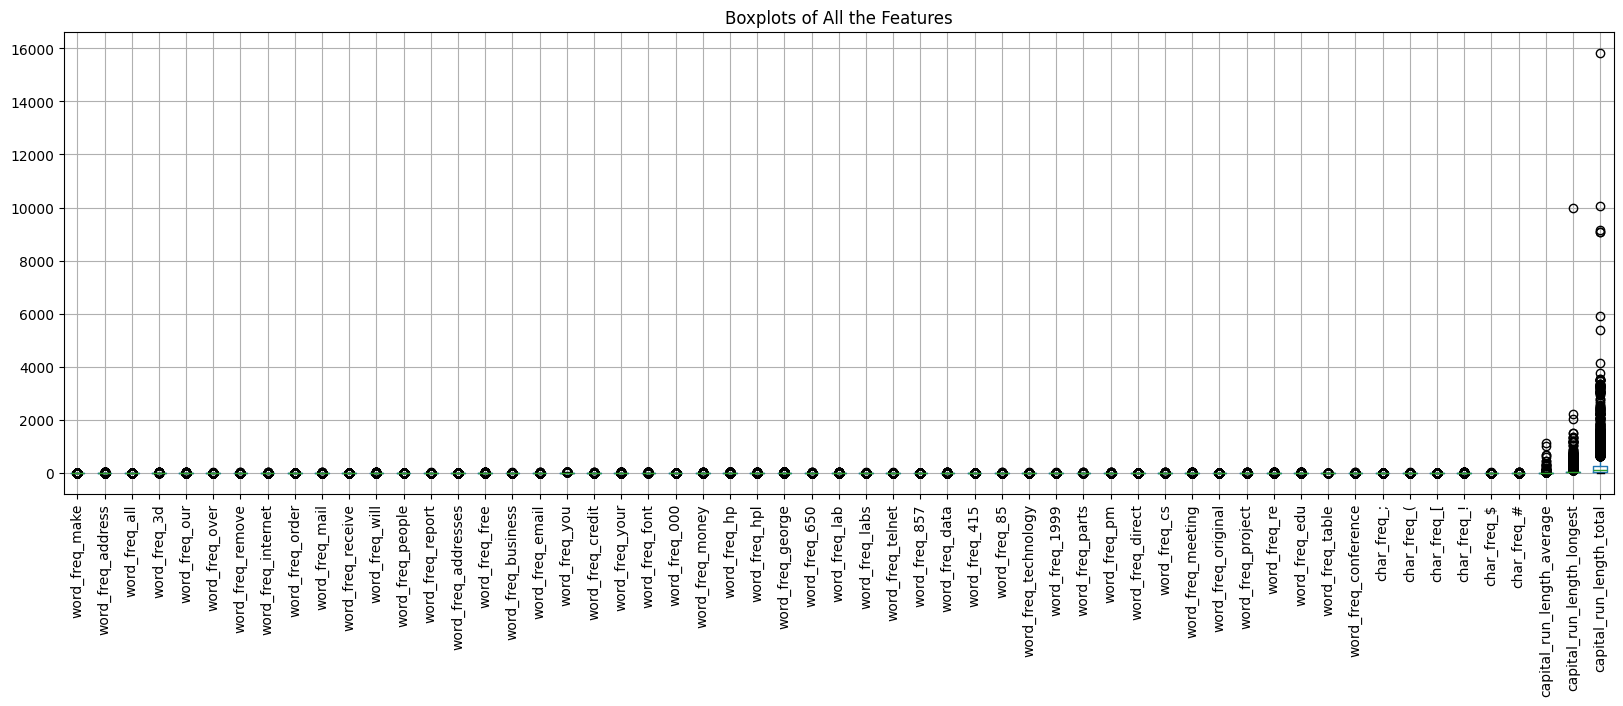

In [19]:
## Boxplot of all features
df.iloc[:,0:57].boxplot(figsize=(20, 6), rot=90)
plt.title('Boxplots of All the Features')
plt.show()

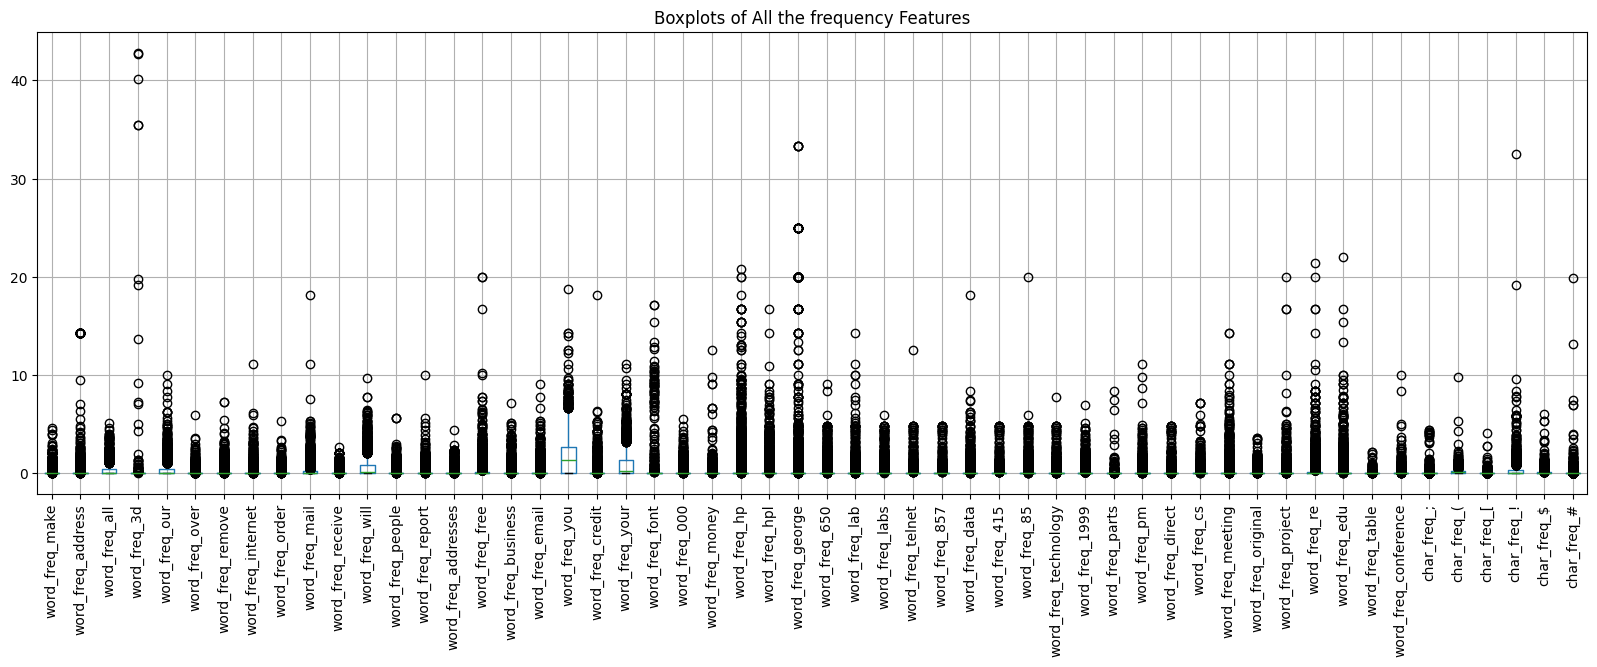

In [20]:
## Boxplot of frequency features
freq_df = df.iloc[:,0:54]
freq_df.boxplot(figsize=(20, 6), rot=90)
plt.title('Boxplots of All the frequency Features')
plt.show()

In [21]:
robust_scaler  = RobustScaler()
df_scaled = robust_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)

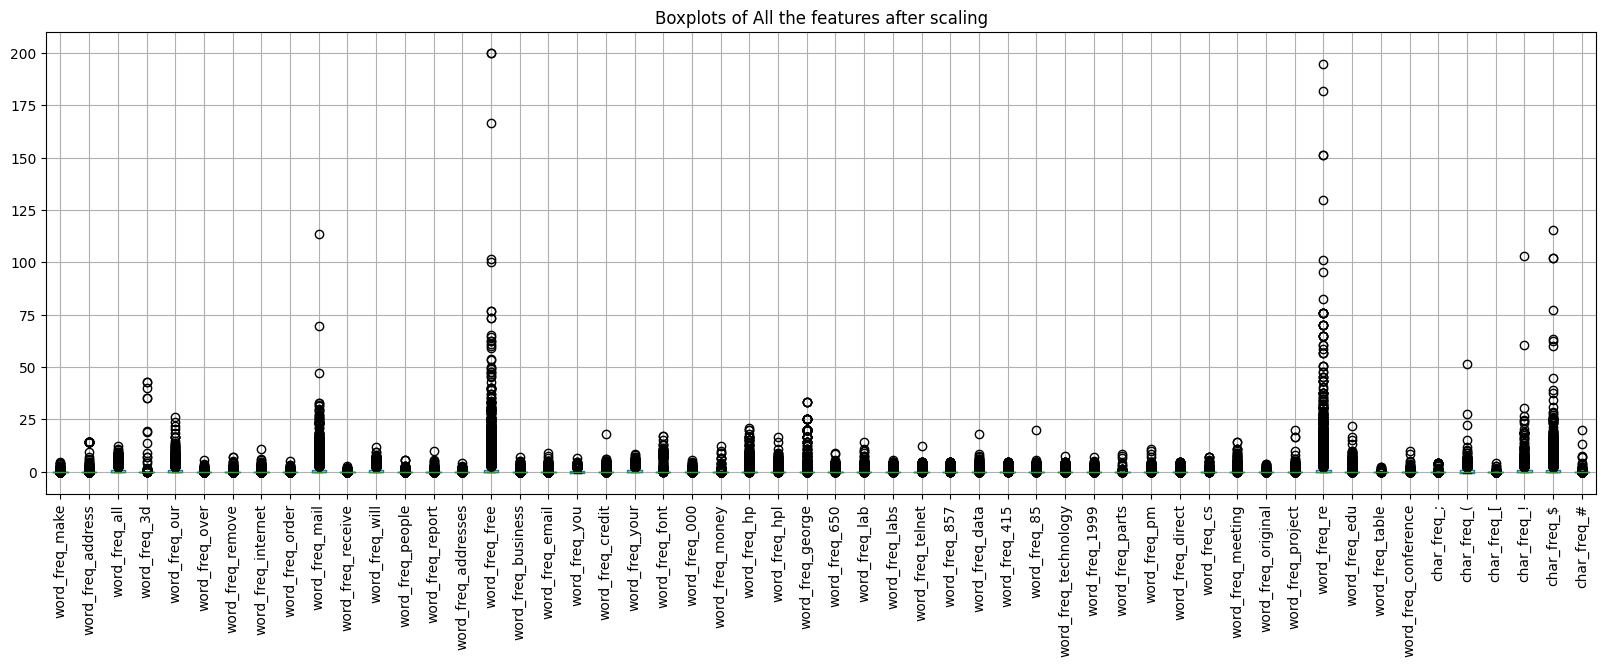

In [22]:
# Boxplot of all features after scaling
freq_df = df_scaled.iloc[:,0:54]
freq_df.boxplot(figsize=(20, 6), rot=90)
plt.title('Boxplots of All the features after scaling')
plt.show()

We can see that the values are now within a much better range, the outliers are still there, but with much less influence, and most of the values are within a readable range as shown in the previous plot, we only needed one boxplot for all the features instead of using 2 just like before scaling.

Even though I've scaled the data earlier on, and showed the differences with plots, I will be doing it again later on to the training and tesing sets, This approach would avoid Data leakage, which is the exposure of information between test and training data as they must be independent. This usually happens in the preprocessing steps such as standardization and PCA.
By doing standardization and PCA to the initial df, we would expose the model to the testing data, and the model will perform better in numbers, but this will result in overfitting and test results will be misleading (Rukshan Pramoditha, 2022).

## Summary
In the previous cells, I started by exploring the dataset at first, noticed some inconsistencies about it so:
- I changed all the object data types into float
- Removed all the missing and unwanted values (zero, '?' etc..)
- Removed the Unnamed: 0 column due to its irrelevance
These steps were necessary as part of cleaning the data, as there's no point in visualising or implementing a model with dirty data.

Then I went more into the Exploratory Data Analysis, where I checked the distribution of the emails and noticed the very slight imbalance (60/40), explored the correlation heatmap and explored some of the most correlated features, identified multicollinearity. Then I compared the capital run length between spam and non spam-emails followed by a comparative summary table that outlines some keys characteristics that belong to spam emails such as longer capital run lengths, higher frequencies of certain wrods (free, you, your etc..) this finding is highly important when it comes to the distinction of the email type achieved by the algorithm.

For the scaling, we will use RobustScaler, scaling is essential before doing PCA as it is sensitive to the variance of each feature, and since we have some variance in our features, it will disproportionately affect the principal components (Jha, 2024). The reason I chose RobustScaler is because StandardScaler and MinMaxScaler are quite sensitive to outliers, while RobustScaler handles outliers and skewness in a much better way by using the median instead of mean which helps regarding the outliers we have and scales based on the Interquartile range (75th quantile - 25th quantile)   (Nalcin, 2022).

While scaling was shown here, further techniques would be applied within the modelling section to avoid the leakage as mentioned previously. However, we can see the effects of RobustScaler on the features already (from 0-thousands to 0-200). RobustScaler is known well to handle outliers because it uses median and interquartile range (75th quantile - 25th quantile) making it resilient to outliers, but it preserves them as well which we may need as some spam emails may have frequencies occuring too much which is so common (Nalcin, 2022). However, later on during my model selection and part of my trying to get the best performance, I went to explore log transformation and minmax scaler which did actually perform better than using RobustScaler. Even though I'm convinced with the choice of Robust Scaler as a first option, the difference in the results have made me change the scaling method.

Also PCA was also applied after, because one of the models that I chose (KNN) is sensitive to high dimensionality and we had to reduce it in order to get the best of it.


# Modelling

In [23]:
X = df.drop(columns='is_spam')
y = df['is_spam']

## KNN Classifier

KNN is a distance-based algorithm that classifies samples based on the majority class among their nearest neighbors. It's highly sensitive to feature scaling and outliers, in addition to high dimensionality which makes preprocessing crucial. It's suitable for spam detection when feature distributions are well-prepared so that is why I'm going to try several different techniques to make sure we get the best results from this algorithm.

- V1: RobustScaler (Unstratified)
- V2: RobustScaler + Tuning (Unstratified)
- V3: Log Transformation + MinMaxScaler + Tuning (Unstratified)
- V4: RobustScaler (Stratified)
- V5: RobustScaler + Tuning (Stratified)
- V6: Log Transformation + MinMaxScaler + Tuning (Stratified)

###  RobustScaler (Unstratified)


In [24]:
# Splitting the data + robust scaler + PCA 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11)

robust_scaler  = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
# We don't fit the test set, as it would take new median and IQR and cause data leakage, so we transform it only
# Source: https://scikit-learn.org/stable/common_pitfalls.html#how-to-avoid-data-leakage
X_test = robust_scaler.transform(X_test) 

#source: https://builtin.com/machine-learning/pca-in-python
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Number of PCA Components: ", pca.n_components_)

Number of PCA Components:  9


In [25]:
# Default KNN (k=5)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Predicting results and displaying confusion matrix with classification report
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[514  40]
 [ 48 319]]
              precision    recall  f1-score   support

       False       0.91      0.93      0.92       554
        True       0.89      0.87      0.88       367

    accuracy                           0.90       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



In [27]:
# Extracting the main evaluation metrics for a summary table later on
results = []
# List of results, will be displayed in the summary
results.append({
    'Variant': 'RobustScaler (Unstratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### RobustScaler + Tuning (Unstratified)

In [28]:
# Redefining the variables, for a cleaner code and less confusion + more practical when running all cells
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11)
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [29]:
# Define the hyperparameter grid
# source: https://www.linkedin.com/pulse/improve-model-hyperparameter-tuning-k-nearest-muctary-abdallah-1e
param_grid = {'n_neighbors': np.arange(1, 21),
              'weights': ['uniform', 'distance', None],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]
             }

In [30]:
# define the grid search with KNN parameters
grid = GridSearchCV(knn,
                    param_grid, #searching over the parameter grid
                    cv=5, # 5-fold cross valiation
                    scoring='f1', # we evaluate the models by their f1 score, to make sure we balance precision and recall,
                    verbose=1, # displaying number of fits
                    n_jobs=-1 # using all cores
                   )
# train the grid 
grid.fit(X_train, y_train)
# print the best parameters
print("Best Hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


/home/rayen/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [31]:
# add the best hyperparameters to the knn instance 
best_knn = grid.best_estimator_

In [32]:
# train the model with best hyperparameters
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[517  37]
 [ 42 325]]
              precision    recall  f1-score   support

       False       0.92      0.93      0.93       554
        True       0.90      0.89      0.89       367

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



In [33]:
# we add the new results to the list
results.append({
    'Variant': 'RobustScaler + Tuning (Unstratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### Log Transformation + MinMaxScaler (Unstratified)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11) 

# log(1+x), we have some 0's, so we use log(1+x) instead of log(x) since log(0) is undefined
X_train  = np.log1p(X_train)
X_test  = np.log1p(X_test)

# Minmax scaling
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test) 

pca = PCA(n_components=0.95) # pca 95% of the variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.n_components_ # number of the pca components

41

In [35]:
# define the grid search with KNN parameters, using the same set of paramaters defined earlier on
# grid = GridSearchCV(knn,param_grid,cv=5,scoring='f1',n_jobs=-1)
# train the grid 
grid.fit(X_train, y_train)
# print the best parameters
print("Best Hyperparameters:", grid.best_params_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}


/home/rayen/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [36]:
# add the best hyperparameters to the knn instance 
best_knn = grid.best_estimator_

In [37]:
# train the model with best hyperparameters
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[528  26]
 [ 32 335]]
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       554
        True       0.93      0.91      0.92       367

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



In [38]:
results.append({
    'Variant': 'Log Transformation + MinMaxScaler (Unstratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})
print(results)



[{'Variant': 'RobustScaler (Unstratified)', 'Precision': 0.89, 'Accuracy': 0.9, 'Recall': 0.87, 'F1': 0.88}, {'Variant': 'RobustScaler + Tuning (Unstratified)', 'Precision': 0.9, 'Accuracy': 0.91, 'Recall': 0.89, 'F1': 0.89}, {'Variant': 'Log Transformation + MinMaxScaler (Unstratified)', 'Precision': 0.93, 'Accuracy': 0.94, 'Recall': 0.91, 'F1': 0.92}]


###  Default KNN Classifier (stratified split)


Repeating the previous workflow, but with stratified split this time

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11,stratify=y)

X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test) 

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("Number of PCA Components: ", pca.n_components_)

Number of PCA Components:  9


In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[517  41]
 [ 55 308]]
              precision    recall  f1-score   support

       False       0.90      0.93      0.92       558
        True       0.88      0.85      0.87       363

    accuracy                           0.90       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



In [42]:
results.append({
    'Variant': 'RobustScaler (Stratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})

### KNN Classifier after hyperparameter tuning (stratified split)

In [43]:
# grid = GridSearchCV(knn,param_grid,cv=5,scoring='f1')

grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


/home/rayen/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [44]:
best_knn = grid.best_estimator_

In [45]:
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[535  23]
 [ 45 318]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       558
        True       0.93      0.88      0.90       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



In [46]:
results.append({
    'Variant': 'KNN Classifier after hyperparameter tuning (stratified split)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})

### KNN Classifier with log transformation and MinMax Scaler (stratified split)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11, stratify=y) 

X_train  = np.log1p(X_train)
X_test  = np.log1p(X_test)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train) 
X_test = minmax.transform(X_test) 

pca = PCA(n_components=0.95) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Number of PCA Components: ", pca.n_components_)


Number of PCA Components:  41


In [48]:
# grid = GridSearchCV(knn,param_grid,cv=5,scoring='f1')

grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 14, 'p': 2, 'weights': 'distance'}


/home/rayen/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [49]:
best_knn = grid.best_estimator_

In [50]:
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
print(classification_report(y_test,y_pred))

[[540  18]
 [ 29 334]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       558
        True       0.95      0.92      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.95       921
weighted avg       0.95      0.95      0.95       921



In [51]:
results.append({
    'Variant': 'KNN Classifier with log transformation and MinMax Scaler (stratified split)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})

### KNN Summary


In [52]:
pd.set_option('display.max_colwidth', None) 
results = pd.DataFrame(results)
results=results.sort_values(by='F1',ascending=False)
results

,Variant,Precision,Accuracy,Recall,F1
5,KNN Classifier with log transformation and MinMax Scaler (stratified split),0.95,0.95,0.92,0.93
2,Log Transformation + MinMaxScaler (Unstratified),0.93,0.94,0.91,0.92
4,KNN Classifier after hyperparameter tuning (stratified split),0.93,0.93,0.88,0.90
1,RobustScaler + Tuning (Unstratified),0.90,0.91,0.89,0.89
0,RobustScaler (Unstratified),0.89,0.90,0.87,0.88
3,RobustScaler (Stratified),0.88,0.90,0.85,0.87


I had skewness in my data, in addition to high dimensionality, it was necessary to use PCA for the dimensionality reduction where I chose to keep 95% to reduce some of the noise without loosing too much information. For the choice of scaling, I started with Robust scaler at first and tuned the model, I was happy with the results until I moved to the naive bayes where I had to use minmax, so I decided to go back and try minmax scaling with log1p transformation to normalize the data.
I did these preprocessing strategies without stratifying the data at first, then I wanted to explore how the models would behave if I maintain the ratio of my target variable balance, remember we had 60/40, I wanted to see if we preserve that in the splits, how would our model behave.

After testing six KNN variants with different preprocessing, tuning, and splitting strategies, the best-performing model used:
- **log1p transformation**
- **MinMaxScaler**
- **Stratified split**
- **Hyperparameters: k=14, weights='distance' (other params are default)**

This configuration achieved the highest F1 score of 0.93, reflecting a strong balance between Precision (0.95) and recall (0.92) for the positive (spam) class.

The confusion matrix confirmed solid performance:
- 18 False Positives (non-spam misclassified as spam)
- 29 False Negatives (spam misclassified as non-spam)

##### Overall, the preprocessing techniques with the tuning were fruitful as they increased initial accuracy from 90% to 95% and more importantly, we significantly reduced:
##### - False Positives: from 40 → 18
##### - False Negatives: from 48 → 29


## Naive Bayes 

Naive Bayes algorithms are so good choice when it comes to spam detection. However, they are so limited when it comes to optimisation.
Unlike what we did with KNN, where we tuned the paramaters, we don't have the same amount of freedom when it comes to naive bayes.
That is why it is so important to choose the right variant, and since our values do not follow a gaussian distribution (normal distribution), and we are looking at table of words' frequencies. Multinomial Naive Bayes would be the chosen variant.

However, there must be some changes to our data preparation:
- MultinomialNB cannot have negative values, which has happened during scaling with robust scaler, so instead we will use MinMaxScaler that will make sure our values are ranged between 0 and 1.
- PCA would also affect the values ranges as well and may change some to negative, and also we need dimensionality for the MultinomialNB, so we won't be applying PCA in this specific algorithm.

Unlike KNN, MultinomialNB doesn't have many paramaters to change, and changing the values doesn't affect much, so I will be trying to optimise the results by exploring different preprocessing techniques only:
- MinMax scaler only (Unstratified)
- log transformation + MinMax Scaler (Unstratified)
- MinMax scaler only (stratified data)
- log transformation + MinMax Scaler (stratified data)


### MinMax scaler only (Unstratified)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11)
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test) 

In [54]:
mnb = MultinomialNB() 
mnb.fit(X_train, y_train)

MultinomialNB()

In [55]:
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[529  25]
 [ 77 290]]


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.91       554
        True       0.92      0.79      0.85       367

    accuracy                           0.89       921
   macro avg       0.90      0.87      0.88       921
weighted avg       0.89      0.89      0.89       921



In [57]:
# new list of results as we did with knn for comparision 
results = []

results.append({
    'Variant': 'MinMax scaler only (Unstratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### log transformation + MinMax Scaler (Unstratified)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11)
X_train  = np.log1p(X_train)
X_test  = np.log1p(X_test)
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test) 

In [59]:
# Predicting the Test set results
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[447 107]
 [  8 359]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      0.81      0.89       554
        True       0.77      0.98      0.86       367

    accuracy                           0.88       921
   macro avg       0.88      0.89      0.87       921
weighted avg       0.90      0.88      0.88       921



In [61]:
results.append({
    'Variant': 'log transformation + MinMax Scaler (Unstratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### MinMax scaler only (stratified data)

Repeating the workflow with stratified data split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11, stratify=y)
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test) 

mnb.fit(X_train, y_train)

MultinomialNB()

In [63]:
y_pred = mnb.predict(X_test)
cm_mnb =confusion_matrix(y_test, y_pred)
print(cm_mnb)
print(classification_report(y_test,y_pred))

[[547  11]
 [ 71 292]]
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       558
        True       0.96      0.80      0.88       363

    accuracy                           0.91       921
   macro avg       0.92      0.89      0.90       921
weighted avg       0.92      0.91      0.91       921



In [64]:
results.append({
    'Variant': 'MinMax scaler only (stratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### log transformation + MinMax Scaler (stratified data)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11, stratify=y) 
X_train  = np.log1p(X_train)
X_test  = np.log1p(X_test)
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test) 

In [66]:
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[444 114]
 [ 10 353]]
              precision    recall  f1-score   support

       False       0.98      0.80      0.88       558
        True       0.76      0.97      0.85       363

    accuracy                           0.87       921
   macro avg       0.87      0.88      0.86       921
weighted avg       0.89      0.87      0.87       921



In [67]:
results.append({
    'Variant': 'log transformation + MinMax Scaler (stratified data)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### Multinomial Naive Bayes Summary

In [68]:
results = pd.DataFrame(results)
results = results.sort_values(by='F1',ascending=False)
results

,Variant,Precision,Accuracy,Recall,F1
2,MinMax scaler only (stratified),0.96,0.91,0.80,0.88
1,log transformation + MinMax Scaler (Unstratified),0.77,0.88,0.98,0.86
0,MinMax scaler only (Unstratified),0.92,0.89,0.79,0.85
3,log transformation + MinMax Scaler (stratified data),0.76,0.87,0.97,0.85


Four Naive Bayes variants were tested, all using MinMaxScaler due to MultinomialNB's requirement for non-negative input. PCA was not used, as it can produce negative values and reduce meaning from features which affects the algorithm. Although hyperparameter tuning was not used as I believe it wouldn't be fruitful in this case, however preprocessing techniques made a small difference.

Among the tested variants, the best results were achieved using **MinMaxScaler with a stratified split**, where we got 0.88 F1 score while balancing the precision (0.96) and the recall (0.8), this model is so good at minimizing the False Positives (non-spam misclassified as spam), only 11, which is quite important in this context, as we don't want to have important emails hanging in the spam folder. 
However, the number of False Negatives (spam misclassified as non-spam) was 71 which is quite concerning as the model did not achieve well in its main mission, detecting spam.

Interestingly, the log transformation did not work well like it did in the KNN, and made the results much worse as precision went down to 0.76-0.77 despite improving recall which can be due to the changes in the values representing frequencies mainly where they lost some meaning after transformation and scaling, so scaling looks enough in this case.

Stratification clearly improved performance overall, especially when compared to unstratified versions, further reinforcing its value in maintaining class balance for this dataset.

In conclusion, the best-performing Naive Bayes configuration was MinMaxScaler only + Stratified Split, which maintained a strong balance between accuracy, recall, and precision for the spam class.

Overall, we managed to get a reasonable results, but the number of False Negatives was relatively high for this model.

## Random Forest

Based on the findings of the EDA, such as the slight imbalance (60/40), the mulitcolinearity and the high dimensioanality, in addition to the outliers, I was aiming to go for a Tree based algorithm that would be able to handle these changes without any issues.
The choice to go for Random Forest directly instead of exploring a decision 

Random Forest was selected as it naturally handles multicollinearity, is resistant to outliers, and does not require feature scaling or transformation. It also performs well on high-dimensional data (57 is relatively high) , making it a strong option for spam classification in this context.

Since model interpretability and training time were not priorities in this project for me, and the goal was to compare classification performance across different approaches, Random Forest was selected as a stronger alternative that typically generalizes better than a single Decision Tree.

### Default Random Forest (Unstratified)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11)

In [70]:
# Default params
rf = RandomForestClassifier(random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [71]:
# printing default parameters
print(rf.get_params())
y_pred = rf.predict(X_test)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False}


In [72]:
print(confusion_matrix(y_test, y_pred))

[[533  21]
 [ 15 352]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.96      0.97       554
        True       0.94      0.96      0.95       367

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



Notice that there is overfitting, training accuracy is almost 100%, while testing accuracy is 96%

In [74]:
print("Training Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.9997282608695652
Testing Accuracy: 0.9609120521172638


In [75]:
# Extracting the main evaluation metrics for a summary table later on
results = []
# List of results, will be displayed in the summary

results.append({
    'Variant': 'Default Random Forest',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### Random Forest with hyperparameter tuning (Unstratified)

In [76]:
# Source: https://medium.com/@kalpit.sharma/mastering-random-forest-hyperparameter-tuning-for-enhanced-machine-learning-models-2d1a8c6c426f

n_estimators = [200,400,600,1000] # Number of trees in the forest
max_features = ['log2', 'sqrt'] # Number of features to consider at every split
max_depth = [None,10,30,50,70] # Maximum number of levels in tree
min_samples_split = [2, 5] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2] # Minimum number of samples required at each leaf node
bootstrap = [False] # Method of selecting samples for training each tree

# Create the parameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}



grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=2,
    verbose=1, 
    n_jobs=-1, 
    scoring='f1'
)

%time grid_search.fit(X_train, y_train)



Fitting 2 folds for each of 160 candidates, totalling 320 fits
CPU times: user 4.27 s, sys: 97 ms, total: 4.37 s
Wall time: 52 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=11), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [None, 10, 30, 50, 70],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 600, 1000]},
             scoring='f1', verbose=1)

In [77]:
# best combination of parameters
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [78]:
best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

cm_rf= confusion_matrix(y_test, y_pred)
print(cm_rf)

[[534  20]
 [ 15 352]]


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.96      0.97       554
        True       0.95      0.96      0.95       367

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



In [80]:
## Will need this in the model selection part
print("Training Accuracy:", accuracy_score(y_train, best_rf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


Training Accuracy: 0.9997282608695652
Testing Accuracy: 0.9619978284473398


In [81]:
results.append({
    'Variant': 'Random Forest with hyperparameter tuning (Unstratified)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### Default Random Forest (stratified split)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 11,stratify=y)
rf.fit(X_train, y_train)

y_pred= rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[544  14]
 [ 27 336]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       558
        True       0.96      0.93      0.94       363

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



In [83]:
results.append({
    'Variant': 'Default Random Forest (stratified split)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### Random Forest with Hyperparameter tuning (stratified split)

In [84]:
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 160 candidates, totalling 320 fits


/home/rayen/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=11), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [None, 10, 30, 50, 70],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 600, 1000]},
             scoring='f1', verbose=1)

In [85]:
grid_search.best_params_


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [86]:
best_rf = grid_search.best_estimator_

best_rf= best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[545  13]
 [ 24 339]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       558
        True       0.96      0.93      0.95       363

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



In [87]:
results.append({
    'Variant': 'Random Forest with Hyperparameter tuning (stratified split)',
    'Precision': round(precision_score(y_test, y_pred), 2),
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1': round(f1_score(y_test, y_pred),2)
})


### Random Forest Summary

In [88]:
results = pd.DataFrame(results)
results = results.sort_values(by='F1',ascending=False)
results

,Variant,Precision,Accuracy,Recall,F1
0,Default Random Forest,0.94,0.96,0.96,0.95
1,Random Forest with hyperparameter tuning (Unstratified),0.95,0.96,0.96,0.95
3,Random Forest with Hyperparameter tuning (stratified split),0.96,0.96,0.93,0.95
2,Default Random Forest (stratified split),0.96,0.96,0.93,0.94


Random Forest was evaluated using four variants to assess the impact of both stratified data splitting and hyperparameter tuning. No preprocessing was applied, as Random Forest handles outliers, multicollinearity, and different feature scales (frequency feature and capital run features).

The best-performing variant in terms of F1-score was **Random Forest with hyperparameter tuning (Unstratified)**, which achieved an F1-score of **0.96**, with equally strong precision and recall (0.95 and 0.96 respectively). Interestingly, although stratification improved performance in earlier models like KNN and MNB, it did not result in significant gains here — and in fact, the stratified tuned model had slightly lower recall (0.93) and F1-score (0.95).
The successful hyperparamaters combination was:
- n_estimators: 1000
- max_depth: 30
- max_features: log2
- min_samples_leaf: 1 (default)
- min_samples_split: 2 (default)
- bootstrap: False


The confusion matrix of the best-performing model confirms its robustness:  
- **False Negatives (Spam missed):** 15  
- **False Positives (Non-spam misclassified):** 18  

This balance between false positives and false negatives highlights the effectiveness of the tuned model in minimizing both kinds of misclassification which is key in our case. However, if we want False Positives, the tuned stratified RF has 14 False Positives.

Overall, Random Forest provided the strongest performance overall with minimal preprocessing, and the unstratified tuned model emerged as the top performer among all tested configurations.


# Final Classification Summary 

The final classification model selected was **Random Forest with hyperparameter Tuning (Unstratified)** being the one with the best performance and balance between precision and recall.


**Final Metrics on Test Set (Spam class):**
- **Training Accuracy:** 1.00
- **Testing Accuracy:** 0.96
- **Precision:** 0.95
- **Recall:** 0.96
- **F1-Score:** 0.96
- 
The accuracy and F1-score on the **training set** were almost 1.0 (0.9995) , while performance on the **test set** remained at 0.964. This minimal gap suggests that the model generalizes well but there is still a very slight overfitting. This can be due to the high number of trees selected by the grid search (1000), and even the depth of trees as well (30) compared to the size of data. I tried many combinations within my paramater grid, most of them gave very similar results.

The final model achieved both high precision and high recall. High recall (0.96) means the model was able to correctly identify most of the actual spam emails, minimizing false negatives. High precision (0.95) indicates that when the model predicted an email as spam, it was usually correct reducing the number of false flags. This balance is what I was looking for in the model selection alongside with good results, especially by reducing false positives are annoying (mislabeling important emails as spam) while maintaing low false negatives (not being able to detect spam emails correctly).

I managed to slightly improve the base random forest performance (reduced the False negatives from 21 to 18), but I did not manage to reduce the overfitting or massively increase accuracy that only increased from 96% to 96.4% which is quite low.


The figure below compares the confusion matrices of the best-performing variant from each model. Random Forest not only achieved the highest overall F1-score, but also produced the **fewest false negatives (15)** which shows good detection of spam emails, MultinomialNB, was so good at reducing the **False Positives (11)**, but it missed 71 spam emails. KNN was similar to Random Fores in false negatives (18), performing fairly well, but missed more spam emails (29) than Random Forest (15).

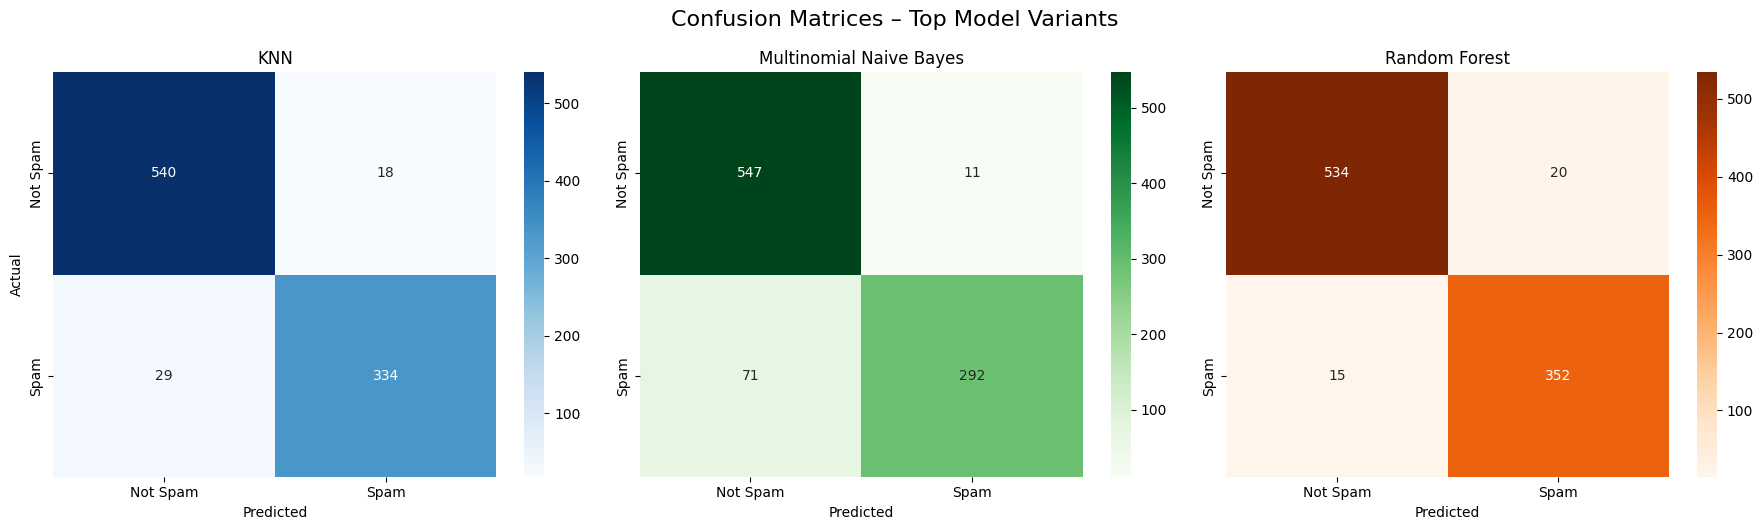

In [89]:
# Optional: Define class labels
labels = ['Not Spam', 'Spam']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title("KNN")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Multinomial Naive Bayes
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title("Multinomial Naive Bayes")
axes[1].set_xlabel("Predicted")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[2], xticklabels=labels, yticklabels=labels)
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Predicted")

plt.tight_layout()
plt.suptitle("Confusion Matrices – Top Model Variants", fontsize=16, y=1.05)
plt.show()


**Conclusion:**  
In spam classification and detection, I believe that balancing the spam identification and reducing the misclassification of non spam emails as spam is highly important, that is why I only focused on False Positives and False Negatives. For this reason I chose **Random Forest with Hyperparameter Tuning (Unstratified)** as the final model. While not perfect and I wouldn't trust it with emails, there may be other algorithms that can be tried which may give better results. The model provided the most reliable and balanced performance among all tested classifiers as shown in the previous matrices.

# References:

- mmalinda (2020). Testing recommendations for binary classification with an imbalanced target variable. [online] Medium. Available at: https://medium.com/@mmalinda/testing-recommendations-for-binary-classification-with-an-imbalanced-target-variable-ff8b120ea8c9.

- Suresh, A. (2020). How to Remove Outliers for Machine Learning? [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8.

- Mustafa Erboga, Ph.D (2024). Multicollinearity in Data Science and Machine Learning: The Hidden Threat and How to Tackle It. [online] Medium. Available at: https://medium.com/academy-team/multicollinearity-in-data-science-and-machine-learning-the-hidden-threat-and-how-to-tackle-it-28e5800dcf4d.

- ‌Nalcin, S. (2022). StandardScaler vs. MinMaxScaler vs. RobustScaler: Which one to use for your next ML project? [online] Medium. Available at: https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9.

- ‌Rukshan Pramoditha (2022). How to Avoid Data Leakage in Data Preprocessing - Data Science 365 - Medium. [online] Medium. Available at: https://medium.com/data-science-365/how-to-avoid-data-leakage-in-data-preprocessing-f2d0357979eb.

In [90]:
end_time = time.time()
print(f"\nNotebook runtime: {end_time - start_time:.2f} seconds")


Notebook runtime: 184.11 seconds
